In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Set the random seed for reproducibility
np.random.seed(42)

In [5]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
# Define the derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# Define the XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [7]:
# Initialize the weights and biases for the hidden layer
hidden_weights = np.random.randn(2, 2)
hidden_bias = np.random.randn(1, 2)
 
# Initialize the weights and biases for the output layer
output_weights = np.random.randn(2, 1)
output_bias = np.random.randn(1, 1)

In [8]:
# Training the model
learning_rate = 0.1
num_iterations = 10000

In [9]:
losses = []
for iteration in range(num_iterations):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
 
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)
 
    # Calculate the loss
    loss = np.mean(0.5 * (y - output_layer_output) ** 2)
    losses.append(loss)
 
    # Backpropagation
    output_error = y - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)
 
    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
 
    # Update the weights and biases
    output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
    output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
 
    hidden_weights += X.T.dot(hidden_delta) * learning_rate
    hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

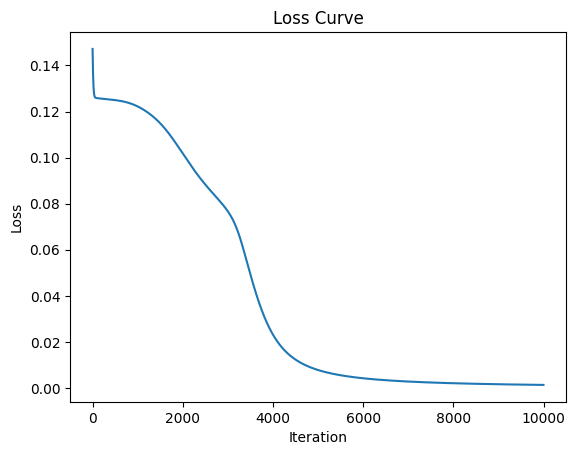

In [10]:
# Plot the loss curve
plt.plot(range(num_iterations), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [11]:
# Generate a meshgrid to plot the decision boundary
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = np.linspace(-0.5, 1.5, 100)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
input_features = np.c_[X_mesh.ravel(), Y_mesh.ravel()]
 
# Forward propagation for the meshgrid points
hidden_layer_input = np.dot(input_features, hidden_weights) + hidden_bias
hidden_layer_output = sigmoid(hidden_layer_input)
 
output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
output_layer_output = sigmoid(output_layer_input)

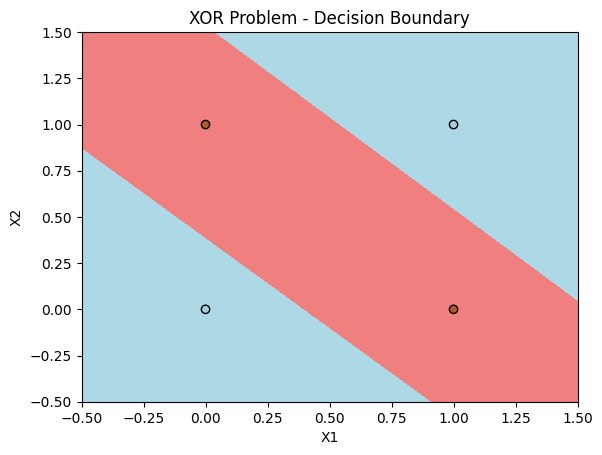

In [18]:
# Reshape the output for contour plotting
Z = output_layer_output.reshape(X_mesh.shape)
 
# Plot the decision boundary and input points
plt.contourf(X_mesh, Y_mesh, Z, levels=1, colors=['lightblue', 'lightcoral'])
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='black')
 
# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Problem - Decision Boundary')
 
# Show the plot
plt.show()